In [1]:
import numpy as np

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers, models, optimizers, callbacks, losses
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

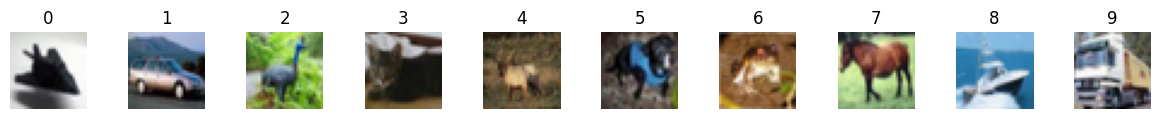

In [3]:
# Define the labels
labels = np.arange(10)

# Plot a sample image from each label
fig, axs = plt.subplots(1, 10, figsize=(15, 1))
for i, label in enumerate(labels):
    ax = axs[i]
    img = x_train[y_train[:, 0] == label][0]
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(str(label))
plt.show()

In [4]:
# Normalize pixel values to be between 0 and 1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Convert labels to categorical one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

In [6]:
# Define the data augmentation pipeline
datagen = image.ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest'
)

In [ ]:
# Define the CNN model architecture
model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),

    layers.Conv2D(filters=96, kernel_size=(3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(filters=96, kernel_size=(3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(filters=96, kernel_size=(3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(filters=192, kernel_size=(3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(filters=192, kernel_size=(3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(filters=192, kernel_size=(3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(filters=192, kernel_size=(3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(filters=192, kernel_size=(1, 1), padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(filters=10, kernel_size=(1, 1), padding='same'),
    layers.BatchNormalization(),
    
    layers.GlobalAvgPool2D(),
])

model.summary()

In [9]:
optimizer = optimizers.Adam()

In [10]:
# Compile the model
model.compile(loss=losses.CategoricalCrossentropy(from_logits=True), optimizer=optimizer, metrics=["accuracy"])

In [8]:
model.load_weights("cifar10_cnn_model.h5")

In [11]:
# Define early stopping and checkpoint callbacks
early_stopping_cb = callbacks.EarlyStopping(patience=10, restore_best_weights=True, verbose=True)
checkpoint_cb = callbacks.ModelCheckpoint("cifar10_cnn_model.h5", save_best_only=True, verbose=True)

In [13]:
# Train the model with data augmentation
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=256),
    epochs=500,
    validation_data=(x_val, y_val),
    callbacks=[
        early_stopping_cb,
        checkpoint_cb
    ]
)

Epoch 1/500
176/176 [==============================] - ETA: 0s - loss: 0.7831 - accuracy: 0.7722
Epoch 1: val_loss improved from inf to 3.44736, saving model to cifar10_cnn_model.h5
176/176 [==============================] - 39s 220ms/step - loss: 0.7831 - accuracy: 0.7722 - val_loss: 3.4474 - val_accuracy: 0.4444
Epoch 2/500
176/176 [==============================] - ETA: 0s - loss: 0.3521 - accuracy: 0.8826
Epoch 2: val_loss improved from 3.44736 to 0.40033, saving model to cifar10_cnn_model.h5
176/176 [==============================] - 36s 202ms/step - loss: 0.3521 - accuracy: 0.8826 - val_loss: 0.4003 - val_accuracy: 0.8706
Epoch 3/500
176/176 [==============================] - ETA: 0s - loss: 0.2591 - accuracy: 0.9132
Epoch 3: val_loss improved from 0.40033 to 0.24923, saving model to cifar10_cnn_model.h5
176/176 [==============================] - 36s 203ms/step - loss: 0.2591 - accuracy: 0.9132 - val_loss: 0.2492 - val_accuracy: 0.9208
Epoch 4/500
176/176 [=======================

KeyboardInterrupt: 

In [17]:
# Plot the training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

NameError: name 'history' is not defined

<Figure size 800x600 with 0 Axes>

In [15]:
# Evaluate the model on the test set
score = model.evaluate(x_test, y_test)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

313/313 [==============================] - 4s 11ms/step - loss: 0.5155 - accuracy: 0.8870
Test loss: 0.5154678821563721
Test accuracy: 0.8870000243186951


In [16]:
# Evaluate the model on the test set
score = model.evaluate(x_train, y_train)
print("Train loss:", score[0])
print("Train accuracy:", score[1])

1407/1407 [==============================] - 14s 10ms/step - loss: 0.0780 - accuracy: 0.9755
Train loss: 0.07804328948259354
Train accuracy: 0.9754666686058044


In [ ]:
model = models.load_model("cifar10_cnn_model.h5")

In [ ]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Convert labels to categorical one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [4]:
# Evaluate the model on the test set
score = model.evaluate(x_test, y_test)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

313/313 [==============================] - 9s 16ms/step - loss: 0.4138 - accuracy: 0.9119
Test loss: 0.41375213861465454
Test accuracy: 0.911899983882904


In [5]:
# Evaluate the model on the test set
score = model.evaluate(x_train, y_train)
print("Train loss:", score[0])
print("Train accuracy:", score[1])

1563/1563 [==============================] - 25s 16ms/step - loss: 0.0415 - accuracy: 0.9908
Train loss: 0.04150541499257088
Train accuracy: 0.9907799959182739
